In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


### SVM
* Control "how wide the street between classes is" by C parameter.
* Small C will lead to a wider street but more margin violations
* Larger C will make fewer margin violations but end up with a smaller margin

In [5]:
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:,(2,3)] ##petal length, petal width
y = (iris["target"]==2).astype(np.float64) ##Iris-Virginica

svm_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge"))
)) 

ss = StandardScaler()
ss.fit_transform(X)
l_svc = LinearSVC(C=1, loss="hinge")
l_svc.fit(X,y)

C:\Users\masahiro\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [6]:
l_svc.predict([[5.5,1.7]])

array([1.])

### Adding polynomial features

In [7]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

In [8]:
polynomial_svm_clf = Pipeline((
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
))

polynomial_svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [12]:
polynomial_svm_clf.predict([[5.5,1.7]])

array([1.])

### polynomial kernel

In [28]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
))

poly_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=1, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

### Gaussian RBF 
defined as $\phi \gamma (x,l) = exp(-\gamma||x-l||^2)$
where $l$ is a landmark and $x$ is an instance to make instances linearly seperable.

* $\phi \gamma (x,l)$ is a bell shaped curve from 0 to 1
* Increase gamma makes the bell-shape curve narrower

Text(0.5, 1.0, 'Gaussian RBF with γ = 0.3')

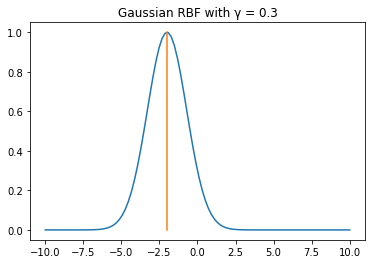

In [40]:
xvec = np.linspace(-10,10,100)
plt.plot(xvec, landmark_at_neg2(xvec))
plt.plot([-2,-2], [0,1])
plt.title("Gaussian RBF with γ = 0.3")

Text(0.5, 1.0, 'Gaussian RBF with γ = 1.0')

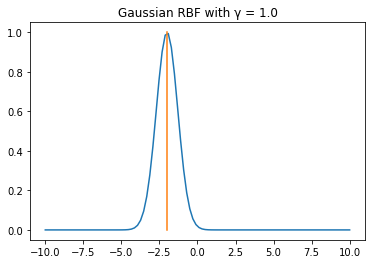

In [41]:
xvec = np.linspace(-10,10,100)
plt.plot(xvec, landmark_at_neg2(xvec, 1))
plt.plot([-2,-2], [0,1])
plt.title("Gaussian RBF with γ = 1.0")

In [38]:

def landmark_at_neg2(x, gamma=0.3):
    return np.exp(-gamma*np.square(x+2))
def landmark_at_1(x, gamma=0.3):
    return np.exp(-gamma*np.square(x-1))

##in the case x1 = -1
landmark_at_neg2(-1) ##new feature x2
landmark_at_1(-1) ##new feature x3

0.30119421191220214

In [27]:
from sklearn.svm import SVC

rbf_kernel_svm_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
))

rbf_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=0.001, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [57]:
def class1(x,y):
    if (x-5)**2+(y-5)**2<=25:
        return True
def class2(x,y):
    if (x+5)**2+(y+5)**2<=25:
        return True

c1 = []
c2 = []
num=0
while num <30:
    p  = np.random.randint(-10,10,2)
    if class1(p[0],p[1]):
        c1.append(p)
        num+=1
    elif class2(p[0],p[1]):
        c2.append(p)
        num+=1
np.array(c1)

array([[1, 2],
       [5, 2],
       [5, 6],
       [4, 6],
       [8, 8],
       [2, 1],
       [3, 4],
       [4, 4],
       [8, 1],
       [2, 6],
       [9, 7],
       [9, 2],
       [7, 6],
       [5, 1],
       [8, 6],
       [8, 1],
       [3, 4]])

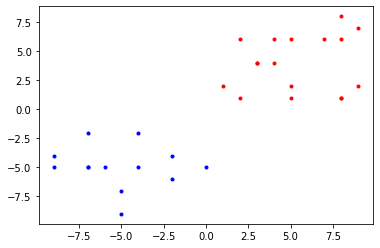

In [63]:
plt.plot(np.array(c2)[:,0],np.array(c2)[:,1],"b.")
plt.plot(np.array(c1)[:,0],np.array(c1)[:,1], "r.")


In [82]:
from scipy.optimize import minimize
d1 = np.ones((len(c1),1))
d2 = -np.ones((len(c2),1))
c3 = np.concatenate((c1,c2), axis=0)
c3 = np.c_[np.ones(len(c3)),c3]
d3 = np.concatenate((d1,d2), axis=0)

def func(beta):
    return np.sum(np.square(beta))

def const1():
    return [x[0]**2 + x[1], x[0]**2 - x[1]]

x0 = np.array([0,0,0])
minimize(func,x0).x

array([1.85416379e+09, 1.48331380e+09, 1.85410504e+08])

(array([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]]),
 array([[-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.]]))